In [1]:
from nltk.tokenize import sent_tokenize
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import glob
import os
from os import path
import string
import numpy
import re
from __future__ import absolute_import, division, print_function
import pandas as pd
import multiprocessing
import gensim
import random
from tqdm import tqdm

stop = [word.split() for word in open("C:\\Users\\Ruben\\Documents\\Artikelen\\Joris\\stopwords-nl.txt", 'r', encoding = "utf-8").readlines()]

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
os.chdir("D://Scriptie//Data//models")

** Change in Semantic Scale of 'Buitenland' **

Over the course of the nineteenth century, the socio-geographical scale associated with buitenland changed. Nations replaced cities. I draw this conclusion from a comparison in cosine similarity between 'buitenland' and 1) cities, and 2) nations. I take the mean cosine similarity of buitenland and: 'londen', 'brussel', 'parijs' and 'berlijn', as well as the mean cosine similarity between 'buitenland and 'engeland', 'belgie', 'frankrijk' and 'duitschland'.

In [3]:
list_mod = glob.glob('*10yp_model.w2v')

sim_df = pd.DataFrame()

for i in list(range(1815,1915,10)):
    mfn = [m for m in list_mod if int(m[0:4]) == i]
    model = Word2Vec.load(mfn[0])
    lo = model.similarity('londen', 'buitenland')
    be = model.similarity('berlijn', 'buitenland')
    pa = model.similarity('parijs', 'buitenland')
    br = model.similarity('brussel', 'buitenland')
    y = i
    
    tmp = pd.DataFrame([y,lo, be, pa, br]).T
    tmp.columns = ['y', 'lo', 'be', 'pa', 'br']
    sim_df = sim_df.append(tmp)

d = sim_df.iloc[:,1:5]
d['average_c'] = d.mean(numeric_only=True, axis=1)
d['year'] = sim_df['y']
p=d.plot(x='year', y=['average_c'], figsize=(10,5), grid=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.

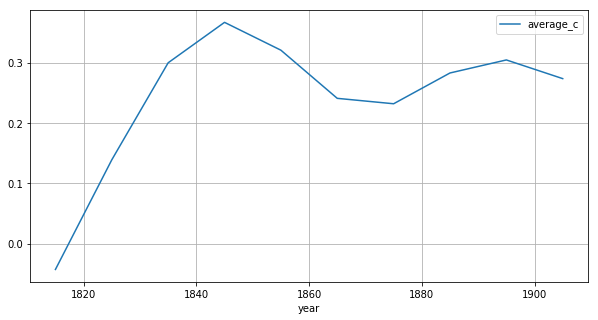

In [6]:
d.plot(x='year', y=['average_c'], figsize=(10,5), grid=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.

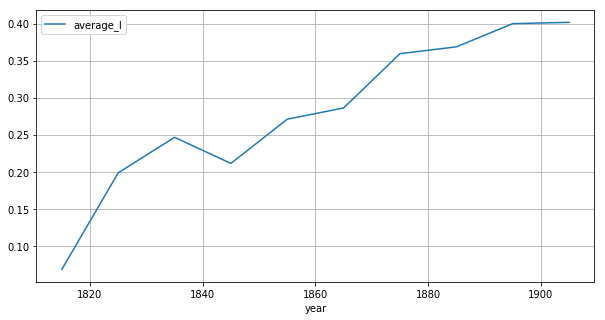

In [9]:
list_mod = glob.glob('*10yp_model.w2v')

sim_dfl = pd.DataFrame()

for i in list(range(1815,1915,10)):
    mfn = [m for m in list_mod if int(m[0:4]) == i]
    model = Word2Vec.load(mfn[0])
    lo = model.similarity('engeland', 'buitenland')
    be = model.similarity('duitschland', 'buitenland')
    pa = model.similarity('frankrijk', 'buitenland')
    br = model.similarity('rusland', 'buitenland')
    y = i
    
    tmp = pd.DataFrame([y,lo, be, pa, br]).T
    tmp.columns = ['y', 'lo', 'be', 'pa', 'br']
    sim_dfl = sim_dfl.append(tmp)

s = sim_dfl.iloc[:,1:5]
s['average_l'] = s.mean(numeric_only=True, axis=1)
s['year'] = sim_dfl['y']
p=s.plot(x='year', y=['average_l'], figsize=(10,5), grid=True)

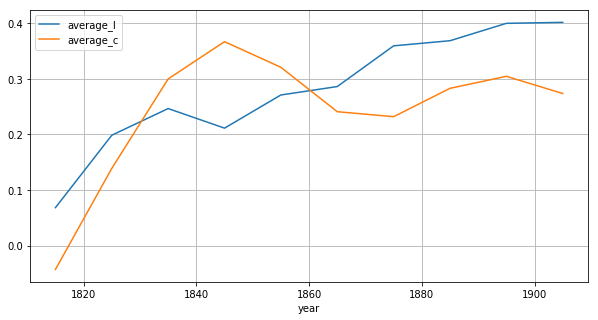

In [10]:
mp = s
s['average_c'] = d['average_c']
p = mp.plot(x='year', y=['average_l', 'average_c'], figsize=(10,5), grid=True)

** Changing Semantic Scale of 'Buitenland' Pt. 2 **

Besides cities and nations, there is also an axis of geographical entites, such as 'vasteland', 'continent', 'wereld'.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.p

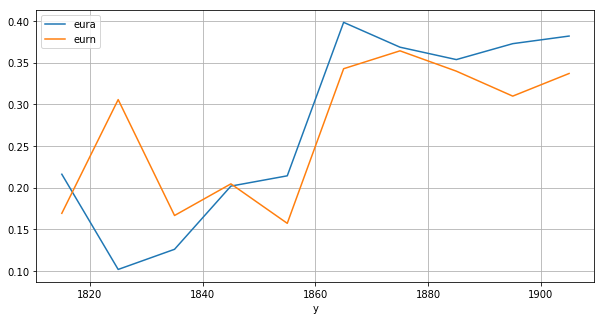

In [11]:
## Europe ##

list_mod = glob.glob('*10yp_model.w2v')

geo = pd.DataFrame()

for i in list(range(1815,1915,10)):
    mfn = [m for m in list_mod if int(m[0:4]) == i]
    model = Word2Vec.load(mfn[0])
    
    if i <= 1870:
        eura = model.similarity('europesche', 'buitenlandsche')
        eurn = model.similarity('europa', 'buitenland')
    if i > 1870:
        eura = model.similarity('europeesche', 'buitenlandsche')    
        eurn = model.similarity('europa', 'buitenland')
    y = i
    
    tmp = pd.DataFrame([y,eura, eurn]).T
    tmp.columns = ['y', 'eura', 'eurn']
    geo = geo.append(tmp)

#s = geo.iloc[:,1:3]
#s['average_l'] = s.mean(numeric_only=True, axis=1)
#s['year'] = sim_dfl['y']
p=geo.plot(x='y', y=['eura', 'eurn'], figsize=(10,5), grid=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipy

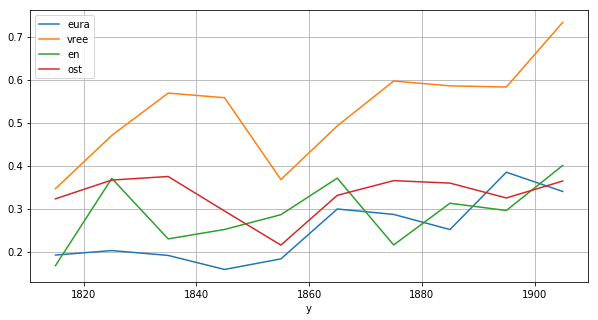

In [12]:
## Strangers and Europeans

list_mod = glob.glob('*10yp_model.w2v')

geo = pd.DataFrame()

for i in list(range(1815,1915,10)):
    mfn = [m for m in list_mod if int(m[0:4]) == i]
    model = Word2Vec.load(mfn[0])
    
    eura = model.similarity('buitenlanders', 'europeanen')
    vree = model.similarity('buitenlanders', 'vreemdelingen')
    ost = model.similarity('buitenlanders', 'handelaars')
    en = model.similarity('buitenlanders', 'engelschen')

    y = i
    
    tmp = pd.DataFrame([y,eura, vree, en, ost]).T
    tmp.columns = ['y', 'eura', 'vree', 'en', 'ost']
    geo = geo.append(tmp)

#s = geo.iloc[:,1:3]
#s['average_l'] = s.mean(numeric_only=True, axis=1)
#s['year'] = sim_dfl['y']
p=geo.plot(x='y', y=['eura', 'vree', 'en', 'ost'], figsize=(10,5), grid=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


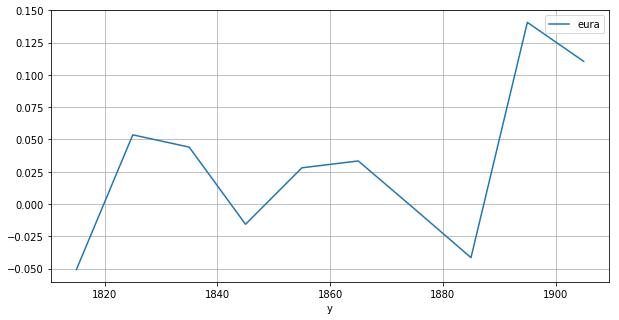

In [14]:
list_mod = glob.glob('*10yp_model.w2v')

geo = pd.DataFrame()

for i in list(range(1815,1915,10)):
    mfn = [m for m in list_mod if int(m[0:4]) == i]
    model = Word2Vec.load(mfn[0])
    
    eura = model.similarity('verre', 'buitenlandsche')
    #vree = model.similarity('buitenlanders', 'vreemdelingen')
    #ost = model.similarity('buitenlanders', 'handelaars')
    #en = model.similarity('buitenlanders', 'engelschen')

    y = i
    
    tmp = pd.DataFrame([y,eura]).T
    tmp.columns = ['y', 'eura']
    geo = geo.append(tmp)

#s = geo.iloc[:,1:3]
#s['average_l'] = s.mean(numeric_only=True, axis=1)
#s['year'] = sim_dfl['y']
p=geo.plot(x='y', y=['eura'], figsize=(10,5), grid=True)